In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("austin_weather.csv")
print("Original Dataset Preview:")
print(df.head())

Original Dataset Preview:
         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevel

In [4]:
df_temp = df.copy()
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_temp['PrecipitationSumInches'] = df_temp['PrecipitationSumInches'].replace("T", 0.0)
df_temp['PrecipitationSumInches'] = pd.to_numeric(df_temp['PrecipitationSumInches'], errors='coerce')

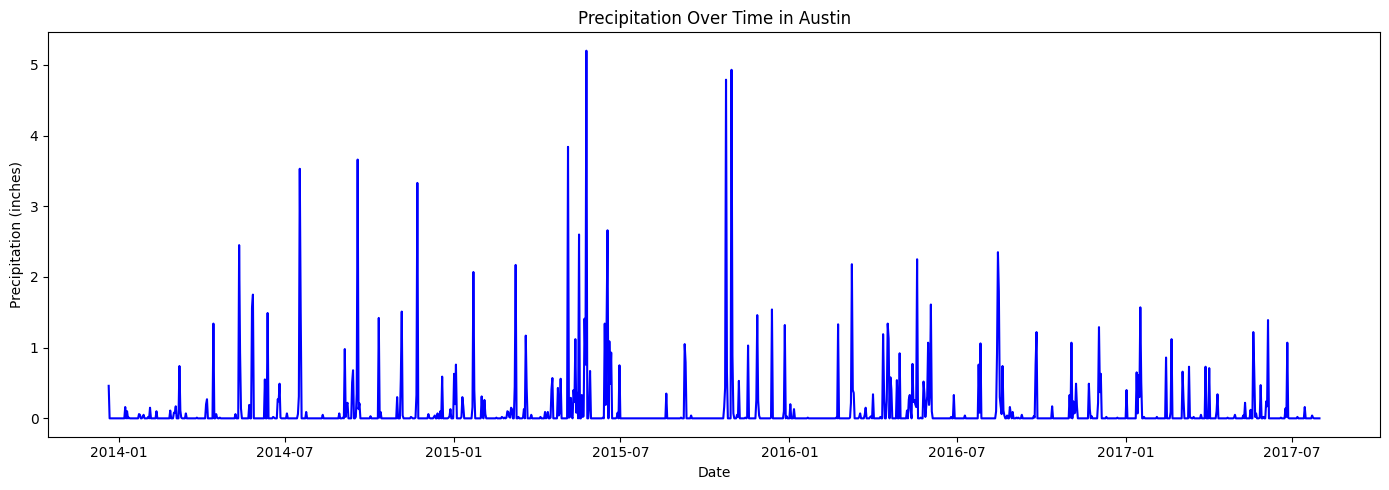

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(df_temp['Date'], df_temp['PrecipitationSumInches'], color='blue')
plt.title("Precipitation Over Time in Austin")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()
plt.show()


In [12]:
df.drop(columns=[col for col in ['Events', 'Date'] if col in df.columns], inplace=True)

df.drop(columns=[col for col in ['Events', 'Date'] if col in df.columns], inplace=True)

df = df.replace("T", 0.0)

df = df.replace("-", np.nan)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)
print(df.columns)


Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')


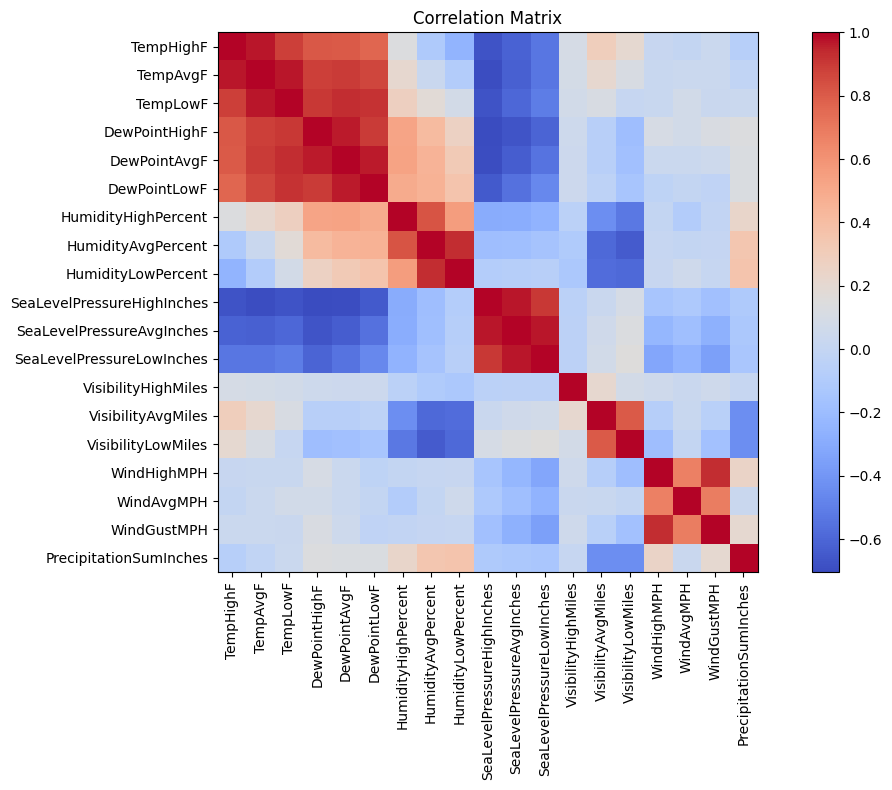

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [14]:
X = df.drop(columns=["PrecipitationSumInches"])
y = df["PrecipitationSumInches"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(X_test)

In [18]:
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error: 0.18410672048419743
R² Score: 0.229095933429867


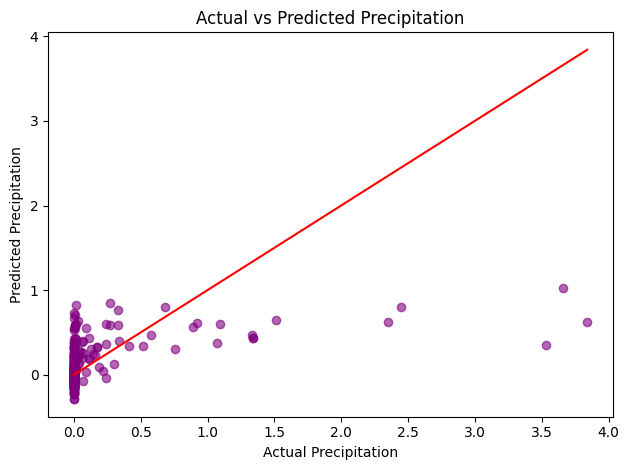

In [19]:
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')  # Reference line
plt.tight_layout()
plt.show()